In [1]:
# Set root directory as working directory
import os
os.chdir('../')

In [2]:
import idtxl
import pickle
import matplotlib.pyplot as plt
from plots import plot_curves_matrix, plot_TE_matrix
from idtxl.visualise_graph import plot_network, plot_selected_vars

# Simulation with standard values

First, we simulate an epidemic using the classical, deterministic, SIR model with age-contact matrices. We set $R_0\sim2.5$ and seed the system with 0.01 infected individuals in the 20-29 years old age-group.

We can see that even though the system was seeded through people over 20 years old, the group that reaches the peak sooner is the 10-19 years old. This seems reasonable given the contact matrix on the right, as clearly this group is the one with the largest interaction between each other. Then, they may act as seeders for the other groups.

In [3]:
analysis = pickle.load(open('results/results_simulation_sus1_JidtKraskovCMI_maxLag10_minLag1.pkl', 'rb'))

[14.99084609 17.95882252 14.48479597 13.23897979 12.93528451 11.2019599
  7.80381996  6.12631616  5.21178151]


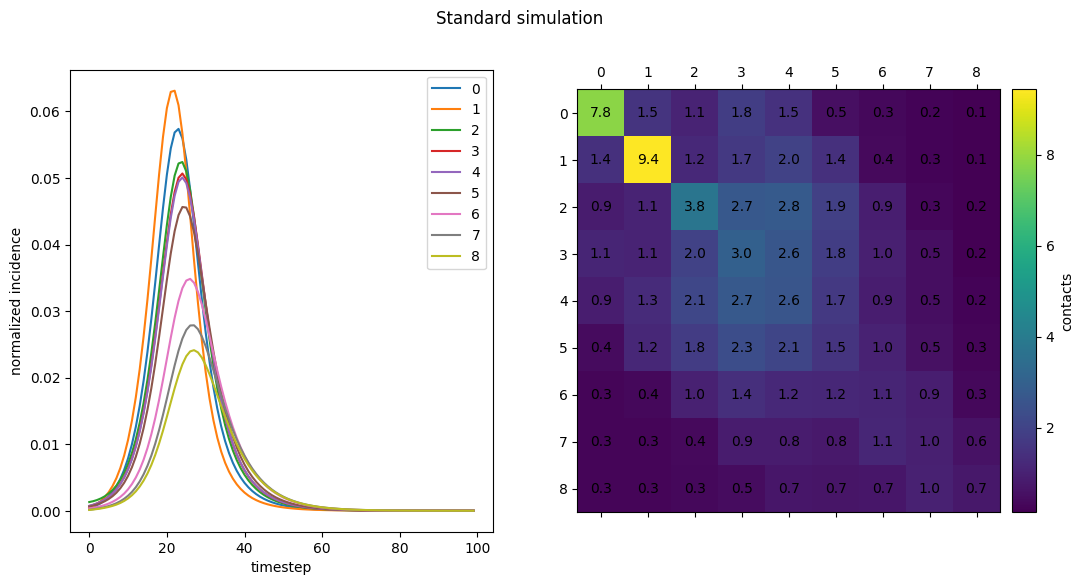

In [4]:
data = analysis['data']

fig, ax = plot_curves_matrix(data, title='Standard simulation')
plt.show()

The IDTxl package identifies the 10-19 y.o. group as the driver of the process, as they infect their brothers and parents.

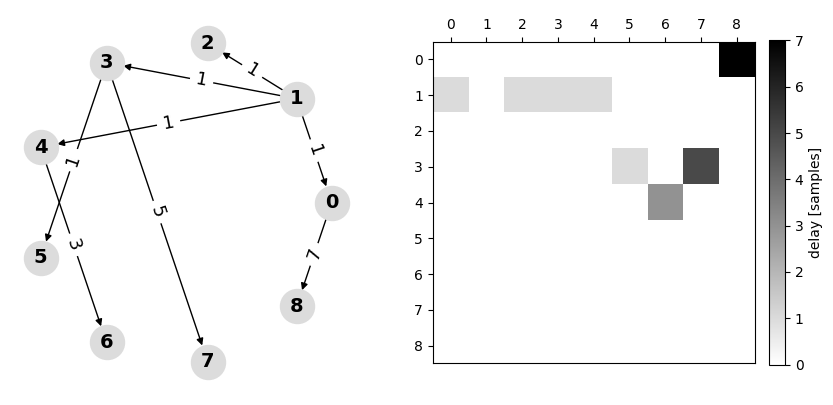

In [5]:
results = analysis['combined_results']
graph, fig = plot_network(results, 'max_te_lag', fdr=False)
plt.show()

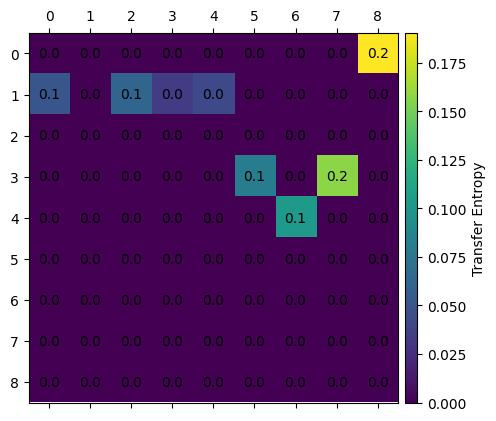

In [6]:
fig, ax = plot_TE_matrix(analysis)
plt.show()

## Simulation with lower susceptibility

We now repeat the simulation but with lower susceptibility to infection for individiuals younger than 20 years old. In this case, we observe that the leading role is played by the group of 30-39 years old, even though they have similar characteristics to the 20-29 years old. However, overall, the transfer entropy is smaller, which is probably due to all groups having roughly a similar number of effective contacts.

In [7]:
analysis = pickle.load(open('results/results_simulation_sus0.56_JidtKraskovCMI_maxLag10_minLag1.pkl', 'rb'))

[ 8.39487381 10.05694061 14.48479597 13.23897979 12.93528451 11.2019599
  7.80381996  6.12631616  5.21178151]


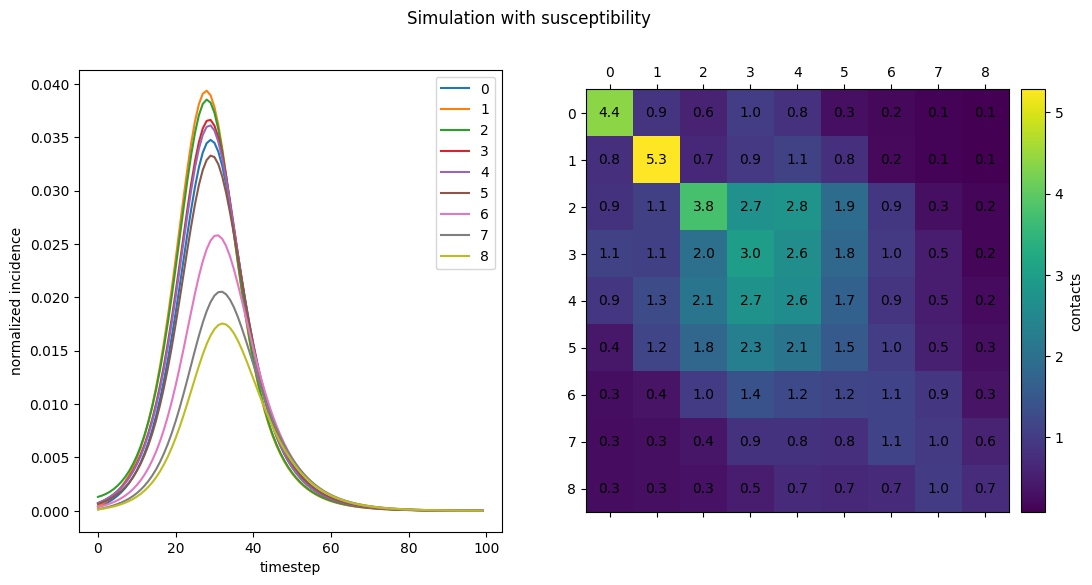

In [8]:
data = analysis['data']

fig, ax = plot_curves_matrix(data, susceptibility=0.56, title='Simulation with susceptibility')
plt.show()

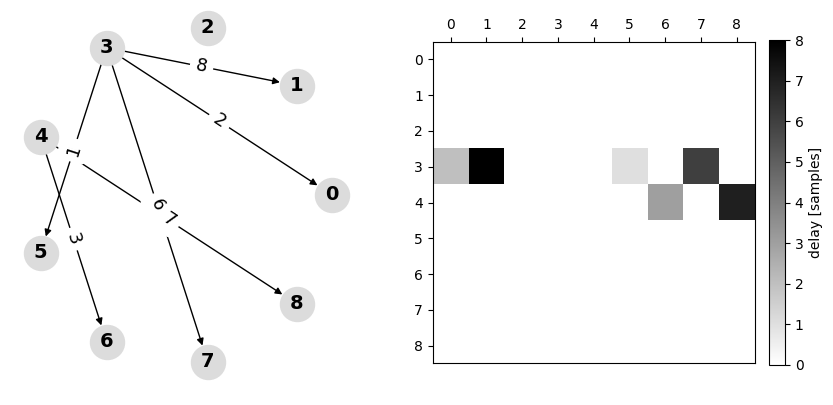

In [9]:
results = analysis['combined_results']
graph, fig = plot_network(results, 'max_te_lag', fdr=False)
plt.show()

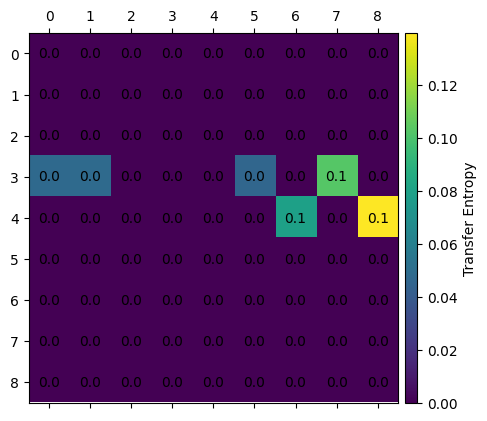

In [10]:
fig, ax = plot_TE_matrix(analysis)
plt.show()

## With z-normalization

We now repeat the same analysis but applying z-normalization during the TE estimation. First, we show the results without susceptibility and then with susceptibility.

In [11]:
analysis = pickle.load(open('results/results_simulation_sus1_JidtKraskovCMI_maxLag10_minLag1_normalized.pkl', 'rb'))

[14.99084609 17.95882252 14.48479597 13.23897979 12.93528451 11.2019599
  7.80381996  6.12631616  5.21178151]


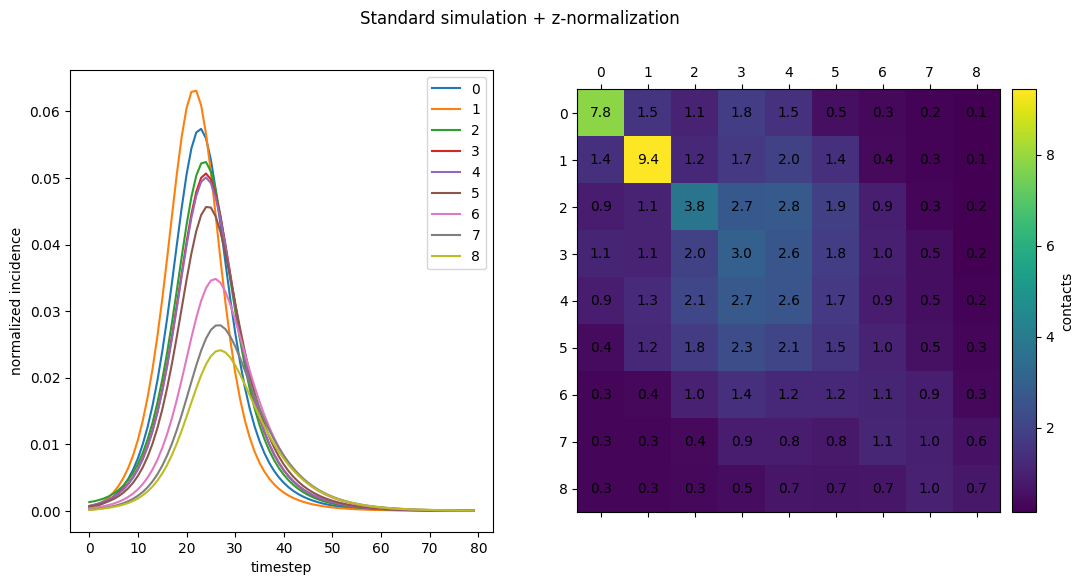

In [12]:
data = analysis['data']

fig, ax = plot_curves_matrix(data, title="Standard simulation + z-normalization")
plt.show()

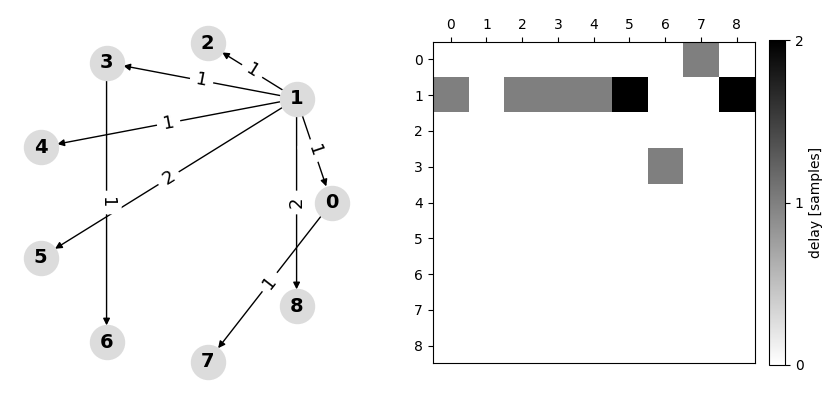

In [13]:
results = analysis['combined_results']
graph, fig = plot_network(results, 'max_te_lag', fdr=False)
plt.show()

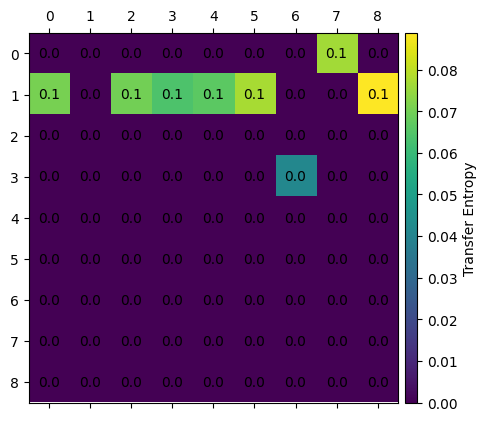

In [14]:
fig, ax = plot_TE_matrix(analysis)
plt.show()

In [15]:
analysis = pickle.load(open('results/results_simulation_sus0.56_JidtKraskovCMI_maxLag10_minLag1_normalized.pkl', 'rb'))

[ 8.39487381 10.05694061 14.48479597 13.23897979 12.93528451 11.2019599
  7.80381996  6.12631616  5.21178151]


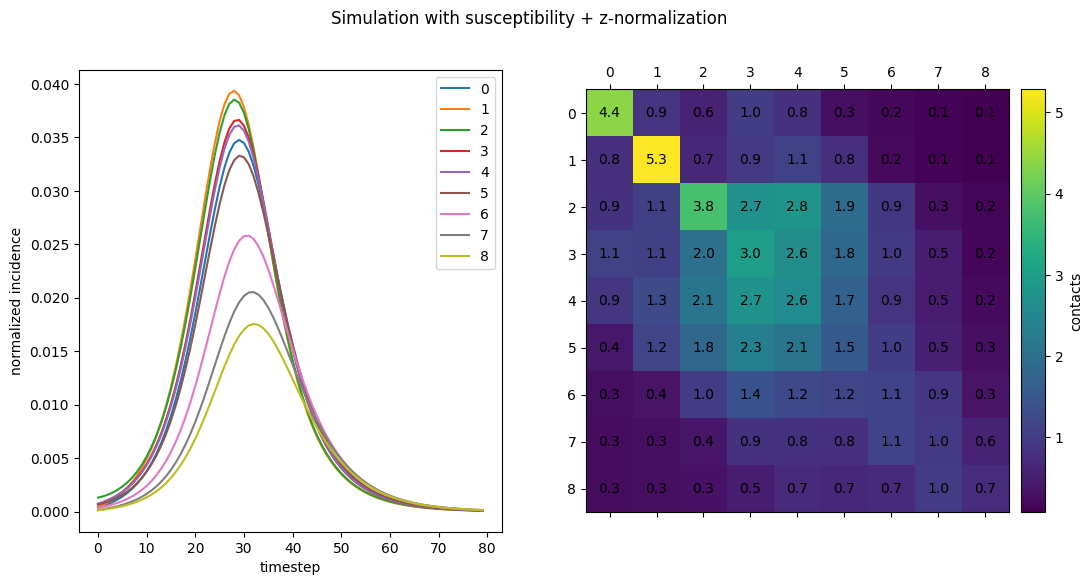

In [16]:
data = analysis['data']

fig, ax = plot_curves_matrix(data, susceptibility=0.56, title="Simulation with susceptibility + z-normalization")
plt.show()

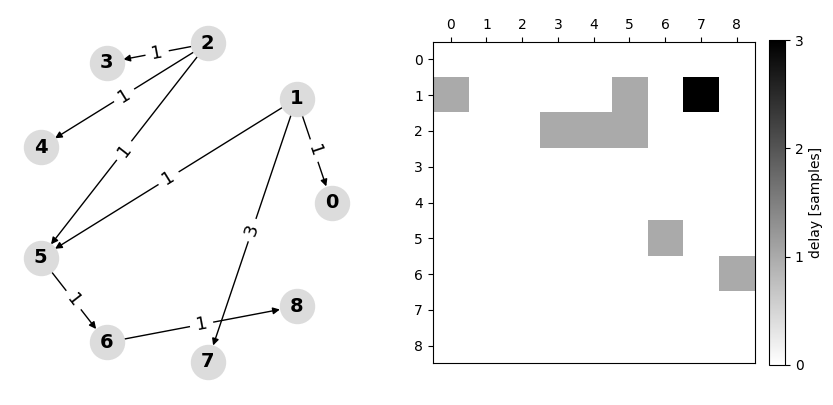

In [17]:
results = analysis['combined_results']
graph, fig = plot_network(results, 'max_te_lag', fdr=False)
plt.show()

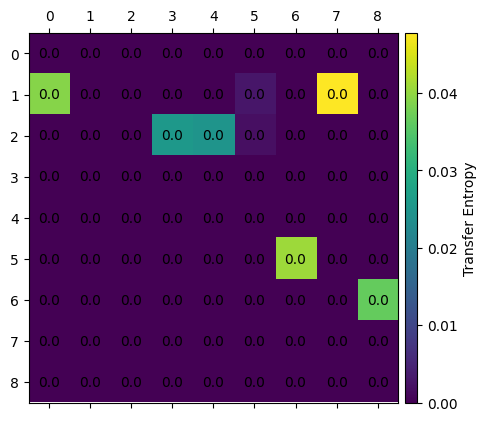

In [18]:
fig, ax = plot_TE_matrix(analysis)
plt.show()

We observe that for the simulations without susceptibility the results are qualitatively similar, even though the TE is slightly larger with the normalization. In the case with susceptibility, however, we see that the TE is greatly reduced. Looking at the incidence as a function of time it seems reasonable that the TE is not easily identifiable given that the curves follow a very similar trend.

# Analysis of real data

We now look at the results for waves 2-6 without z-normalization.

[ 8.39487381 10.05694061 14.48479597 13.23897979 12.93528451 11.2019599
  7.80381996  6.12631616  5.21178151]


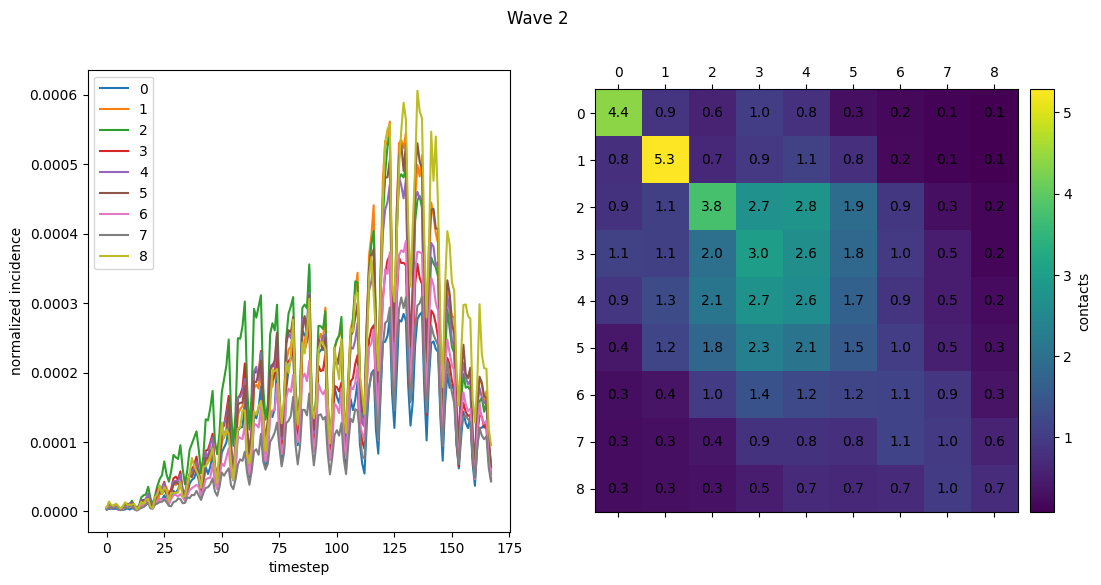

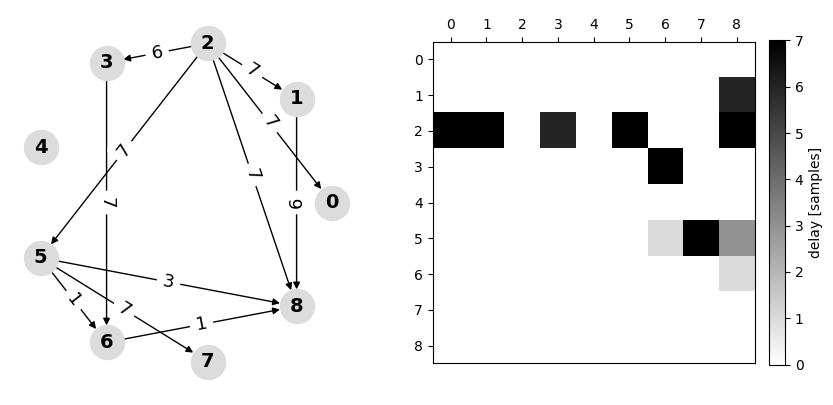

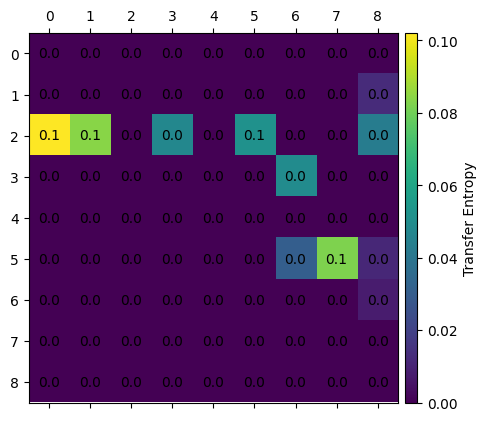

[ 8.39487381 10.05694061 14.48479597 13.23897979 12.93528451 11.2019599
  7.80381996  6.12631616  5.21178151]


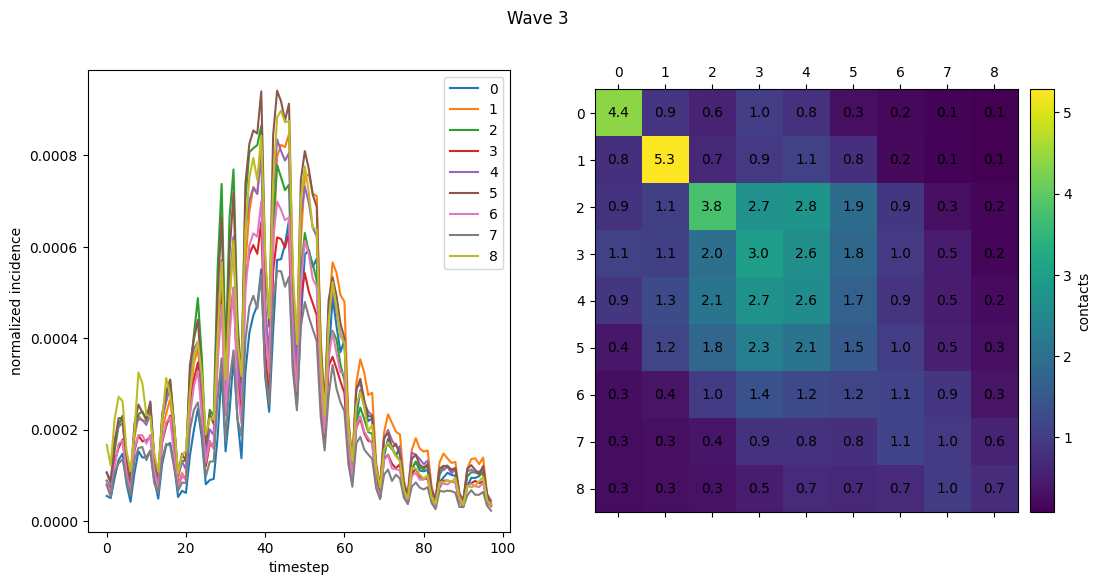

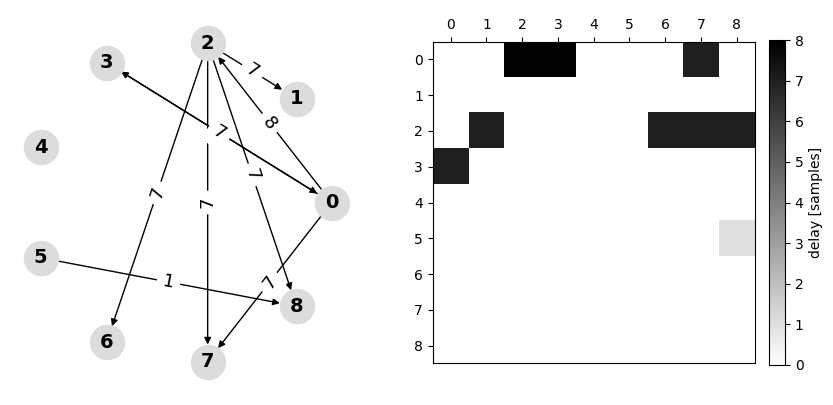

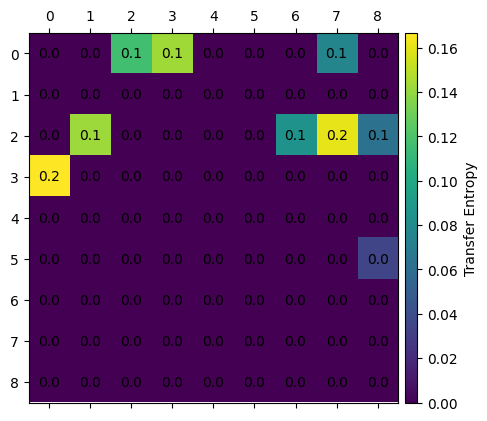

[ 8.39487381 10.05694061 14.48479597 13.23897979 12.93528451 11.2019599
  7.80381996  6.12631616  5.21178151]


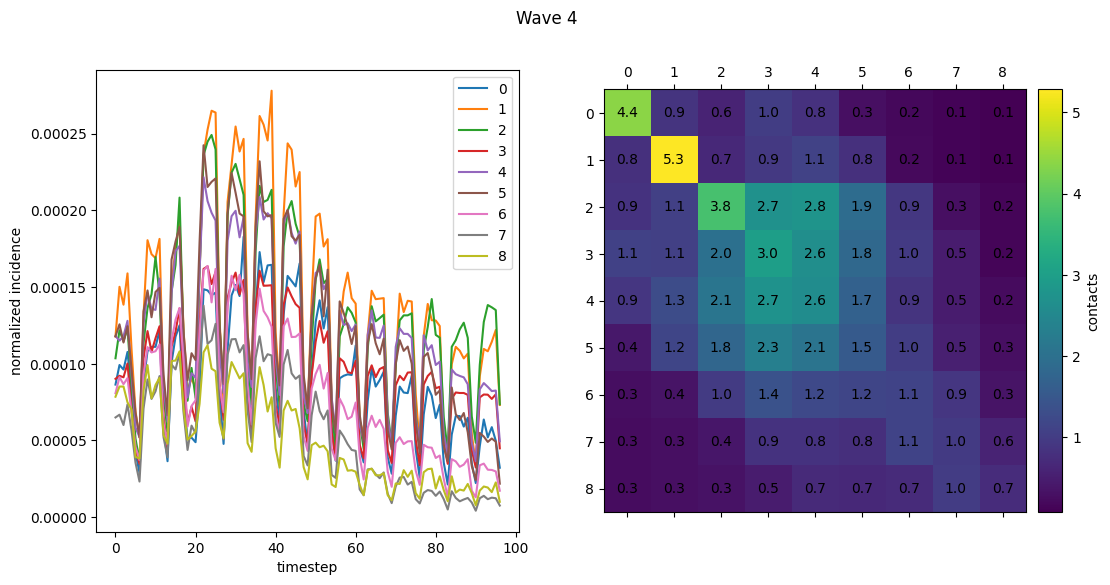

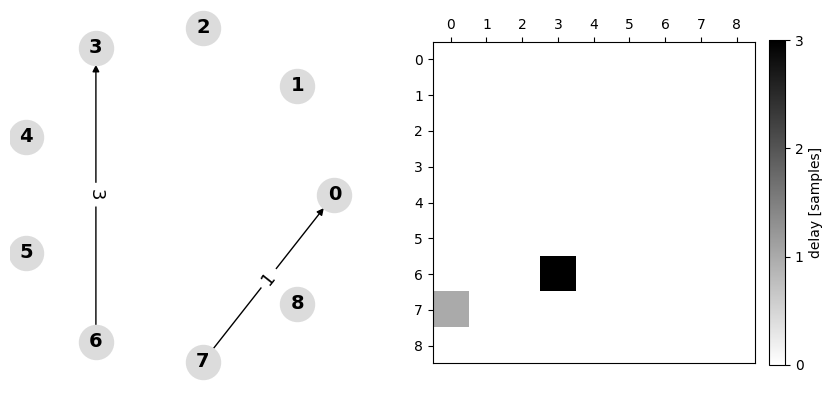

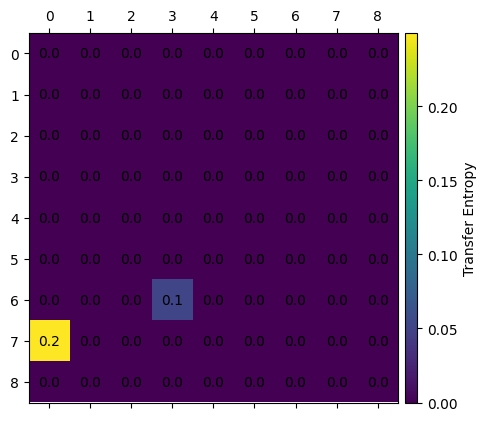

[ 8.39487381 10.05694061 14.48479597 13.23897979 12.93528451 11.2019599
  7.80381996  6.12631616  5.21178151]


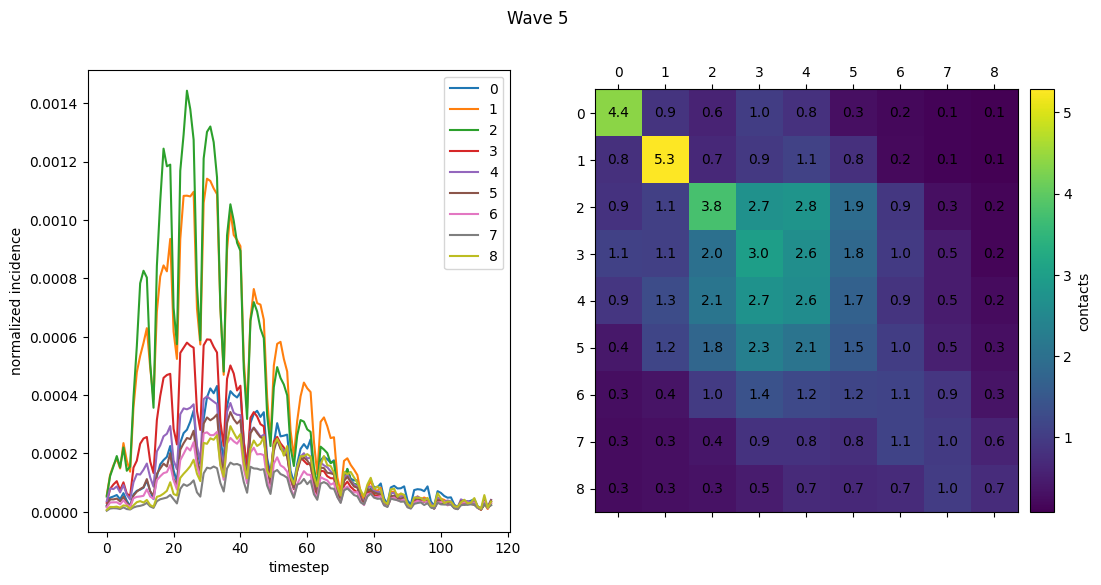

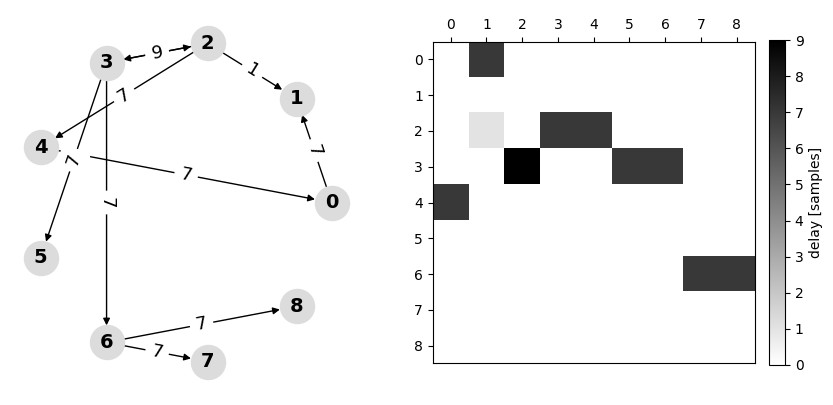

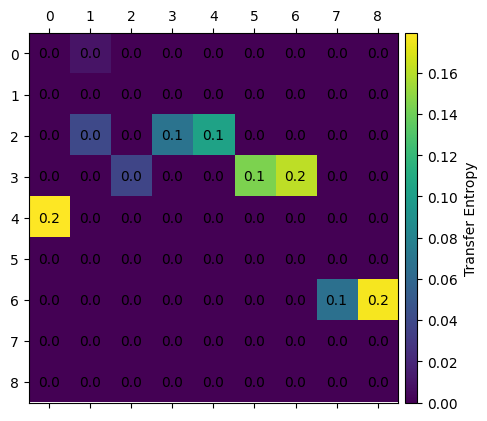

[ 8.39487381 10.05694061 14.48479597 13.23897979 12.93528451 11.2019599
  7.80381996  6.12631616  5.21178151]


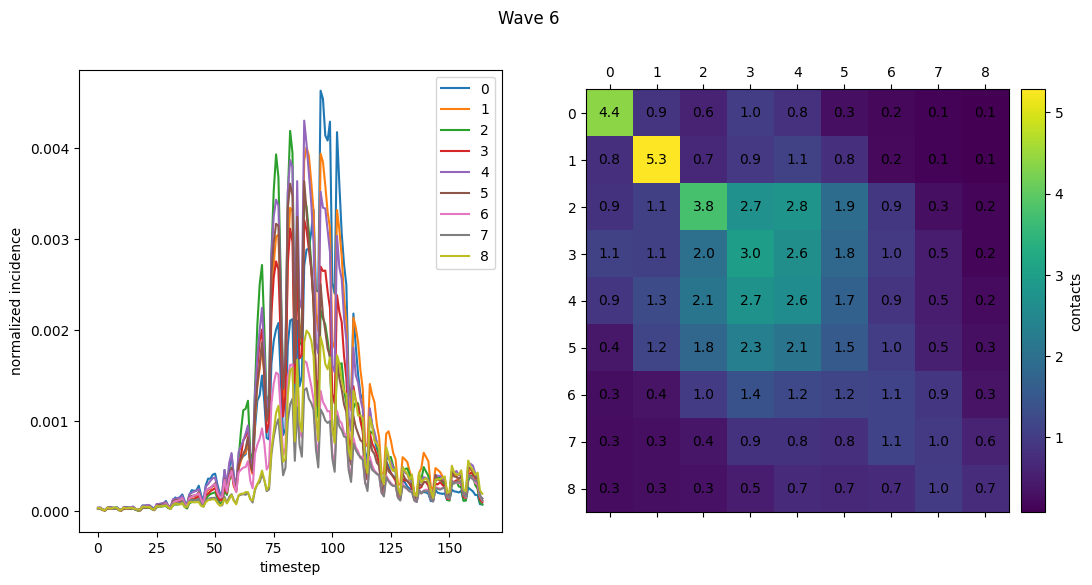

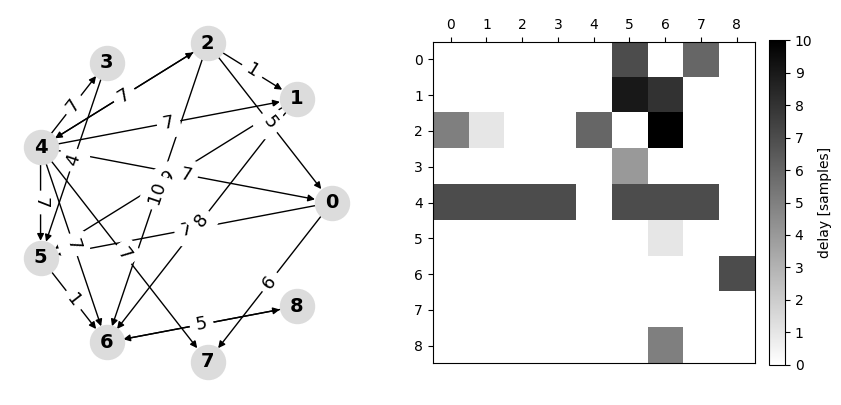

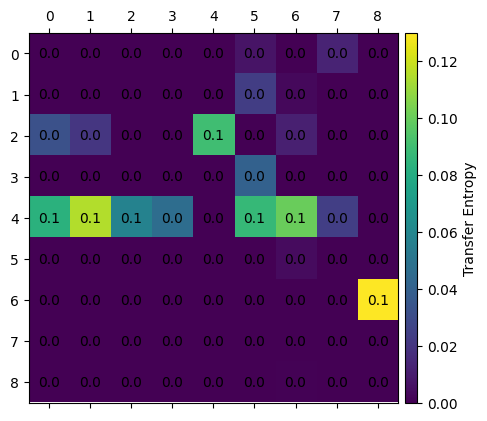

In [25]:
for wave in range(2,7):

    analysis = pickle.load(open(f'results/results_wave{wave}_JidtKraskovCMI_maxLag10_minLag1.pkl', 'rb'))

    data = analysis['data']

    fig, ax = plot_curves_matrix(data, susceptibility=0.56, title=f"Wave {wave}")
    plt.show()

    results = analysis['combined_results']
    graph, fig = plot_network(results, 'max_te_lag', fdr=False)
    plt.show()

    fig, ax = plot_TE_matrix(analysis)
    plt.show()

Next, we look at the results with z-normalization.

[ 8.39487381 10.05694061 14.48479597 13.23897979 12.93528451 11.2019599
  7.80381996  6.12631616  5.21178151]


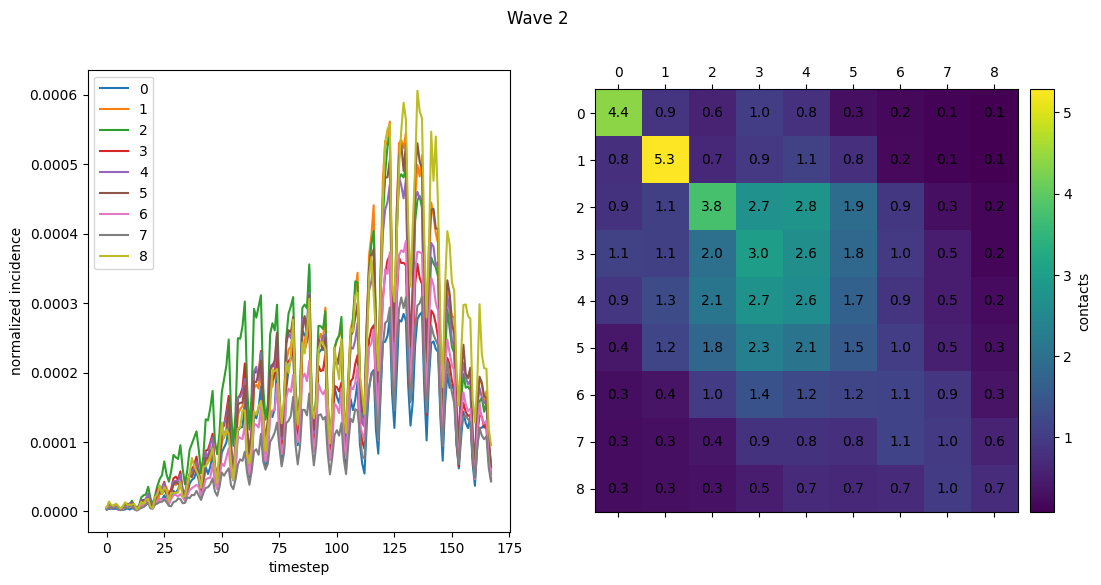

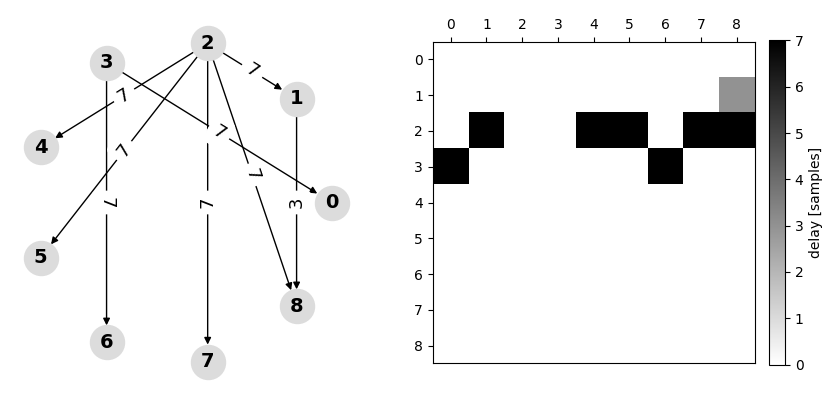

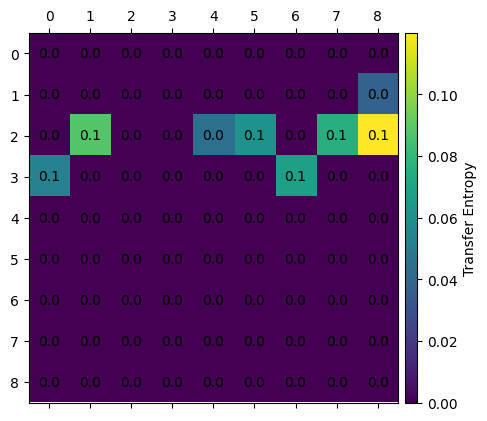

[ 8.39487381 10.05694061 14.48479597 13.23897979 12.93528451 11.2019599
  7.80381996  6.12631616  5.21178151]


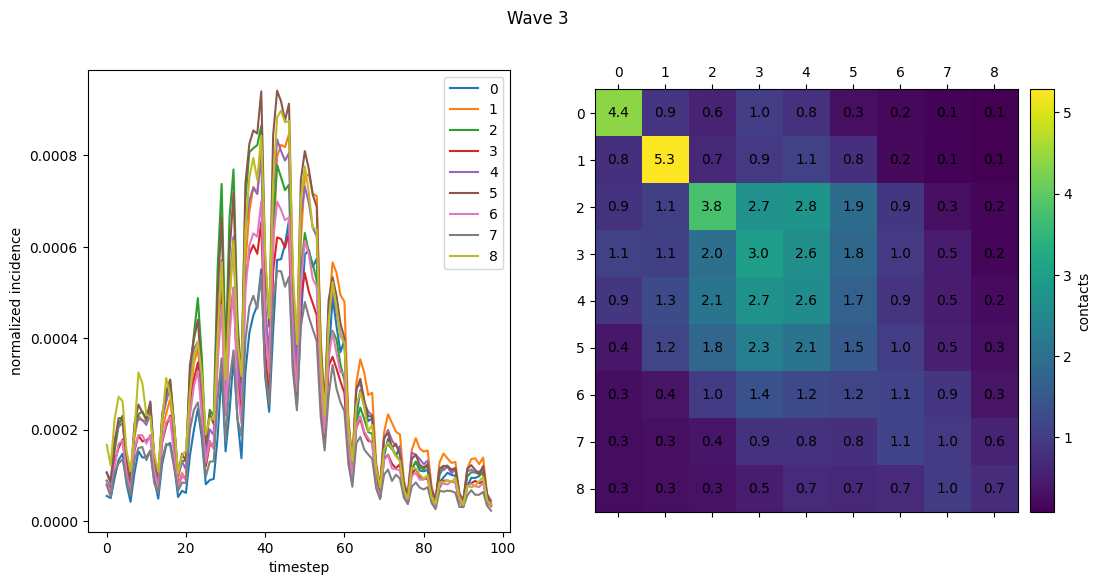

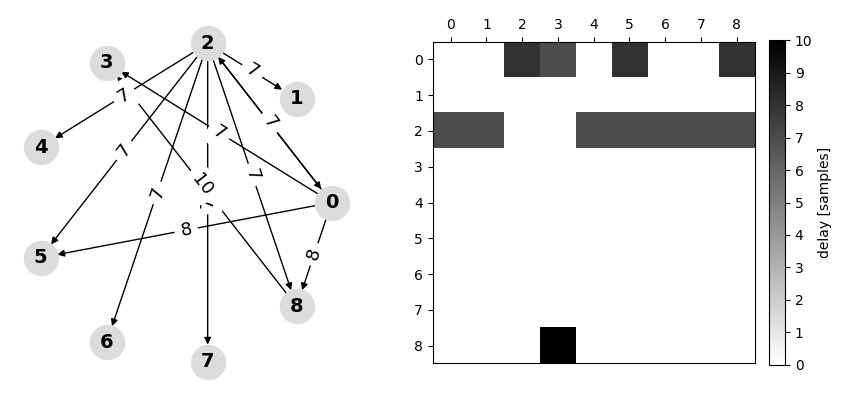

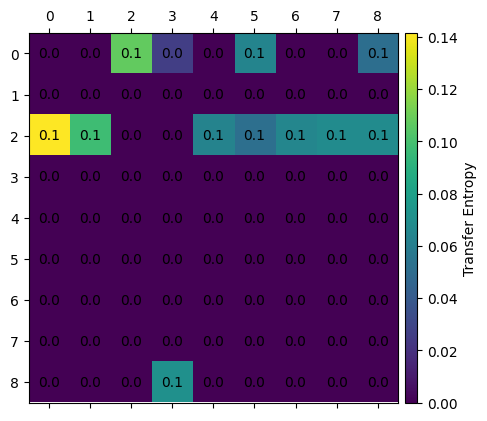

[ 8.39487381 10.05694061 14.48479597 13.23897979 12.93528451 11.2019599
  7.80381996  6.12631616  5.21178151]


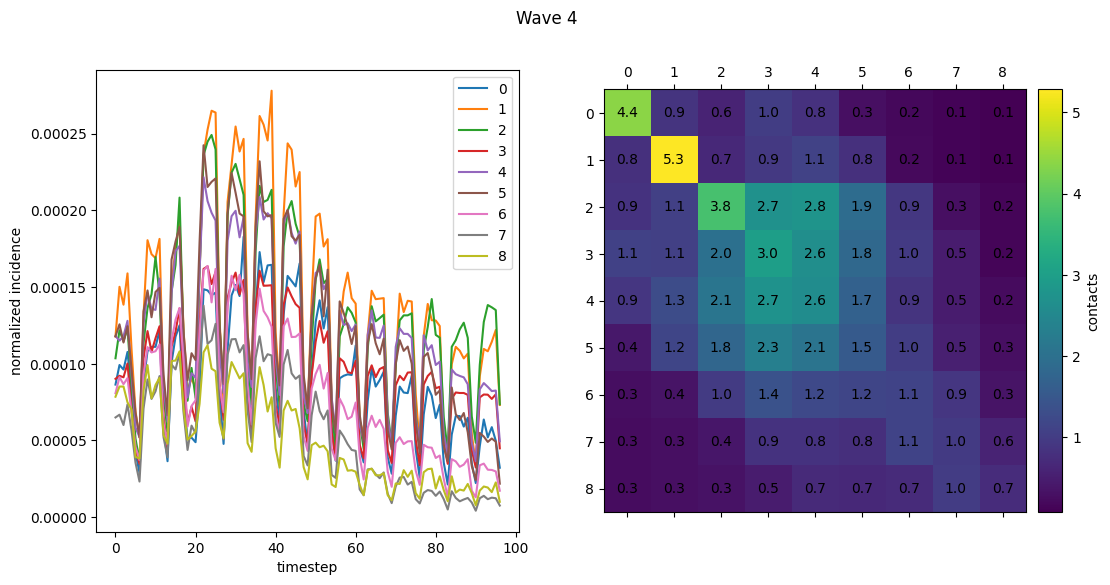

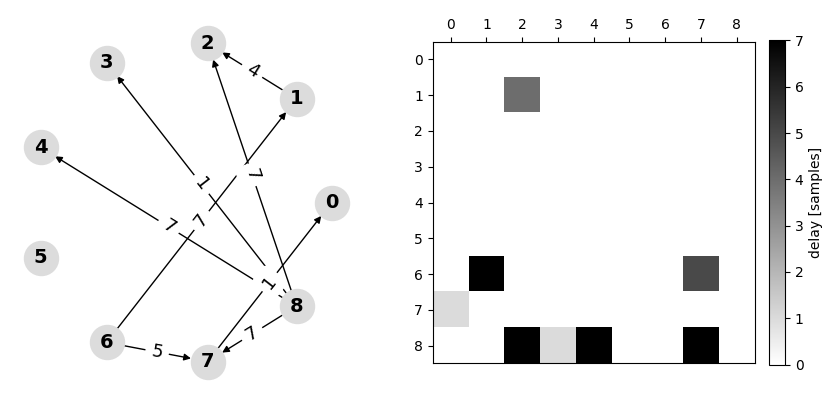

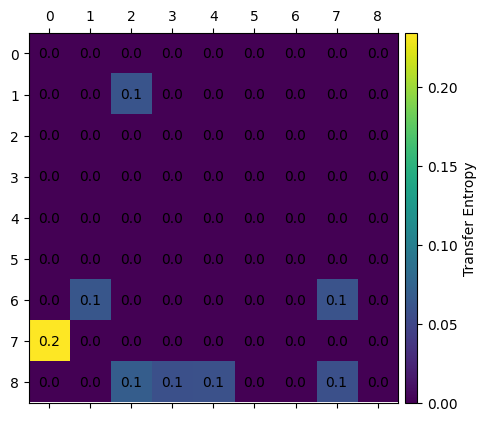

[ 8.39487381 10.05694061 14.48479597 13.23897979 12.93528451 11.2019599
  7.80381996  6.12631616  5.21178151]


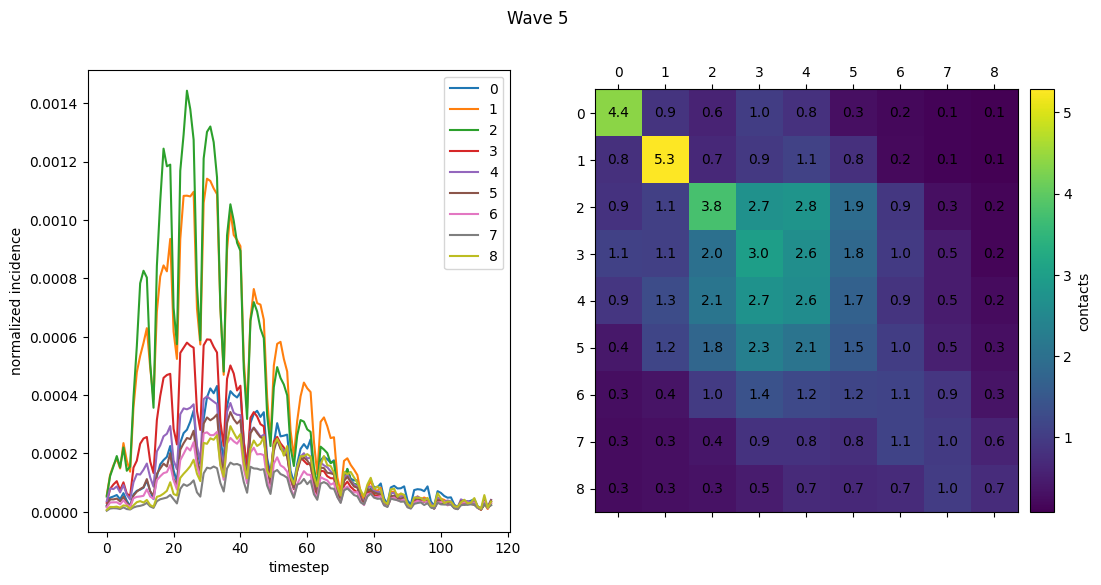

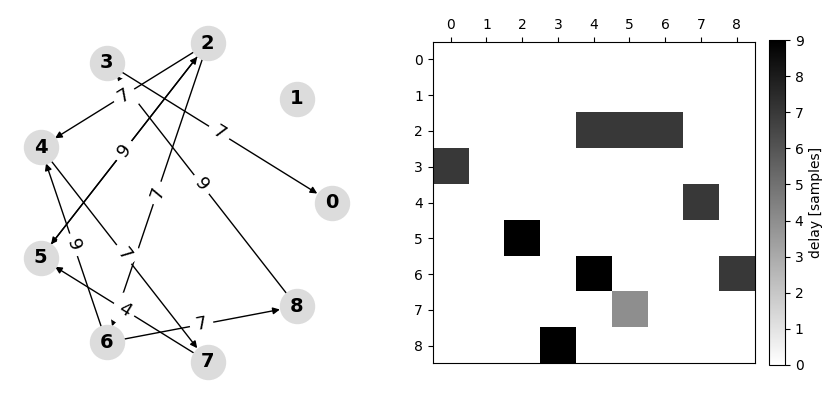

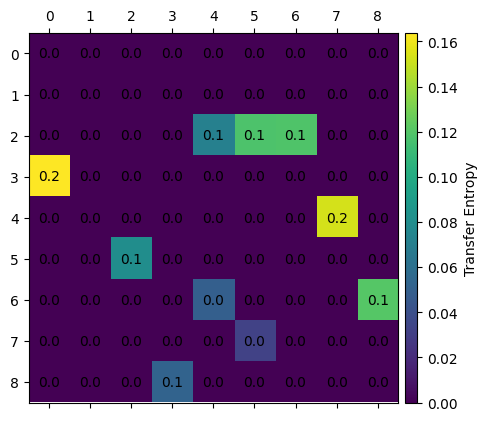

[ 8.39487381 10.05694061 14.48479597 13.23897979 12.93528451 11.2019599
  7.80381996  6.12631616  5.21178151]


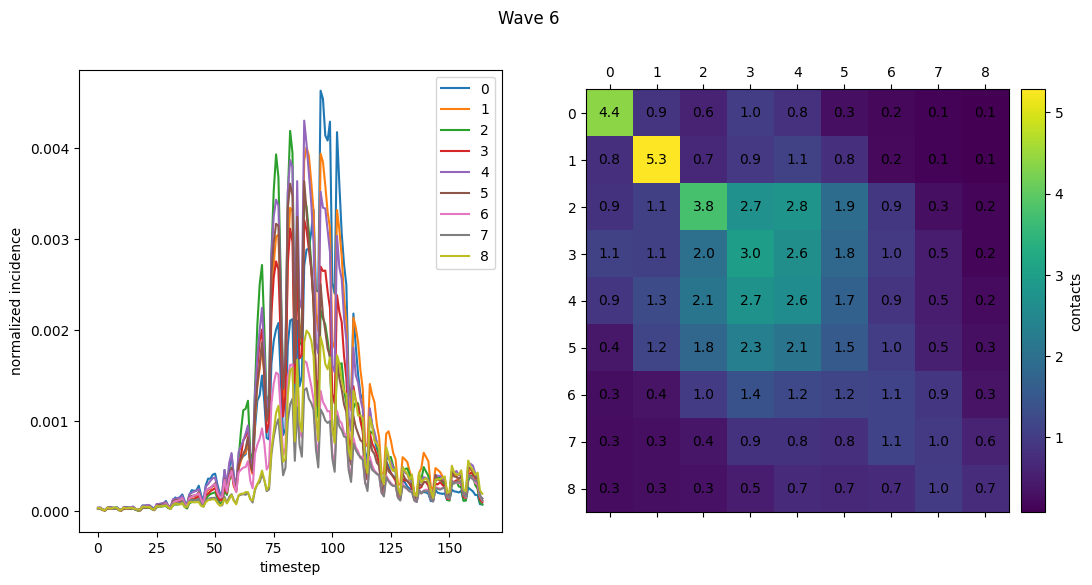

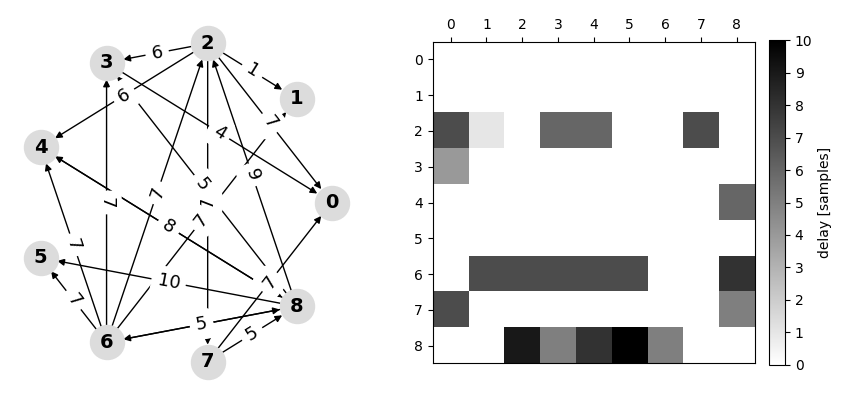

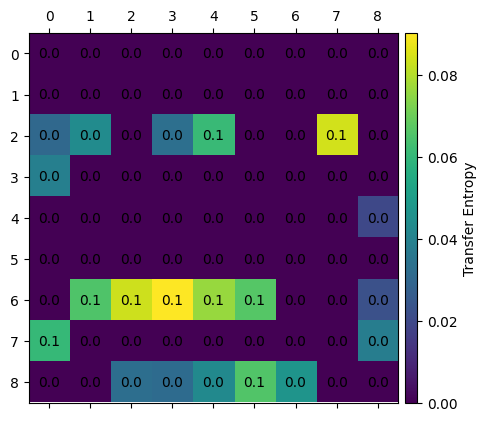

In [26]:
for wave in range(2,7):

    analysis = pickle.load(open(f'results/results_wave{wave}_JidtKraskovCMI_maxLag10_minLag1_normalized.pkl', 'rb'))

    data = analysis['data']

    fig, ax = plot_curves_matrix(data, susceptibility=0.56, title=f"Wave {wave}")
    plt.show()

    results = analysis['combined_results']
    graph, fig = plot_network(results, 'max_te_lag', fdr=False)
    plt.show()

    fig, ax = plot_TE_matrix(analysis)
    plt.show()